In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar



In [2]:
data = pd.read_csv('/content/Uber Drives - .csv')
data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
data.isnull().any()

,0
START_DATE*,False
END_DATE*,True
CATEGORY*,True
START*,True
STOP*,True
MILES*,False
PURPOSE*,True


In [5]:
data.isnull().sum()

,0
START_DATE*,0
END_DATE*,1
CATEGORY*,1
START*,1
STOP*,1
MILES*,0
PURPOSE*,503


In [6]:
data = data.dropna()

In [8]:
data.isnull().sum()

,0
START_DATE*,0
END_DATE*,0
CATEGORY*,0
START*,0
STOP*,0
MILES*,0
PURPOSE*,0


In [10]:
data.dtypes

,0
START_DATE*,object
END_DATE*,object
CATEGORY*,object
START*,object
STOP*,object
MILES*,float64
PURPOSE*,object


In [5]:
import pandas as pd
data = pd.read_csv('/content/Uber Drives - .csv')
data = data.dropna()
data.loc[:, 'START_DATE*'] = pd.to_datetime(data['START_DATE*'],format='%m/%d/%Y %H:%M')
data.loc[:, 'END_DATE*'] = pd.to_datetime(data['END_DATE*'],format='%m/%d/%Y %H:%M')
data.dtypes

,0
START_DATE*,object
END_DATE*,object
CATEGORY*,object
START*,object
STOP*,object
MILES*,float64
PURPOSE*,object


In [9]:
import calendar
hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in data['START_DATE*']:
  hour.append(x.hour)
  day.append(x.day)
  month.append(x.month)
  dayofweek.append(x.dayofweek)
  weekday.append(calendar.day_name[dayofweek[-1]])

data['HOUR']=hour
data['DAY']=day
data['DAY OF WEEK']=dayofweek
data['MONTH']=month
data['WEEKDAY']=weekday

In [10]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


Categories

In [11]:
data['CATEGORY*'].value_counts()

,count
CATEGORY*,
Business,647
Personal,6


<Axes: xlabel='CATEGORY*', ylabel='count'>

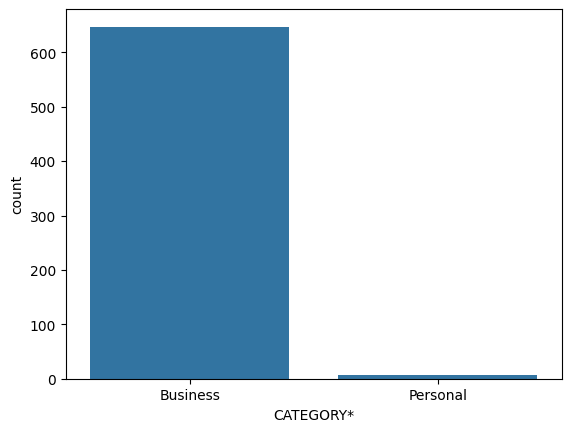

In [16]:
import seaborn as sns
sns.countplot(x='CATEGORY*',data=data)

Time People Travel With Uber

<Axes: ylabel='Frequency'>

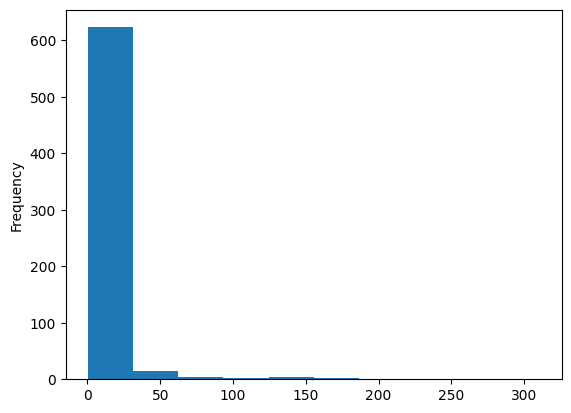

In [17]:
data['MILES*'].plot.hist()

Hour of Most Bookings

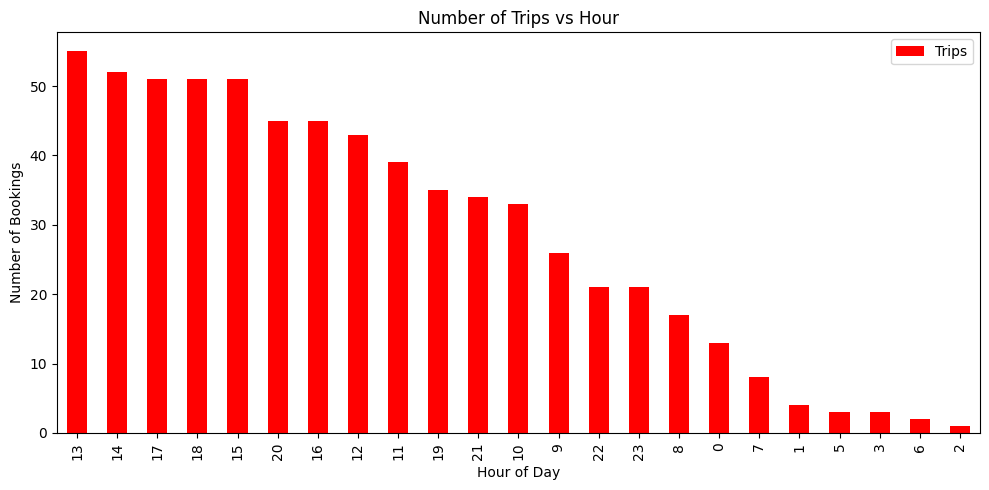

In [25]:
import matplotlib.pyplot as plt

# Ensure the column is datetime
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'])

# Count trips per hour and sort by hour
hours = data['START_DATE*'].dt.hour.value_counts()

# Plot
hours.plot(kind='bar', color='red', figsize=(10, 5), label='Trips')

plt.xlabel('Hour of Day')
plt.ylabel('Number of Bookings')
plt.title('Number of Trips vs Hour')
plt.legend()
plt.tight_layout()
plt.show()


Purpose of Trip

<Axes: xlabel='PURPOSE*'>

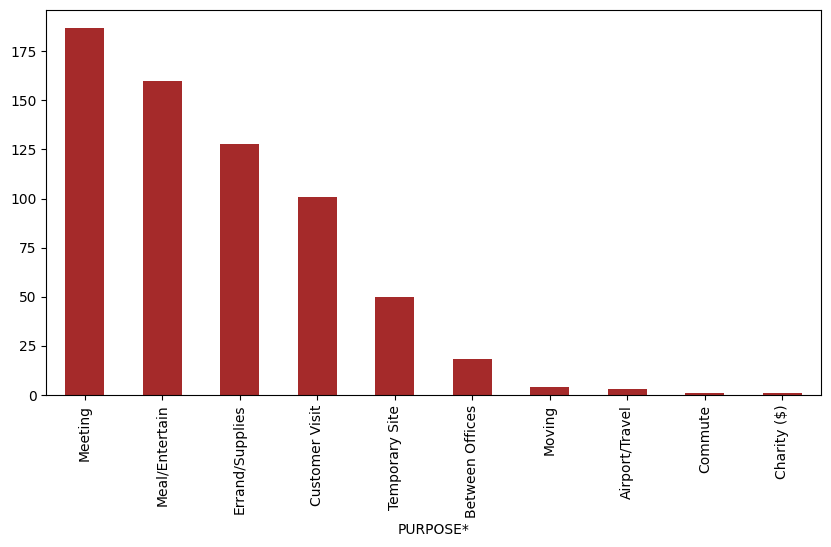

In [27]:
data['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')

Day Of Highest No of Trips

<Axes: xlabel='WEEKDAY'>

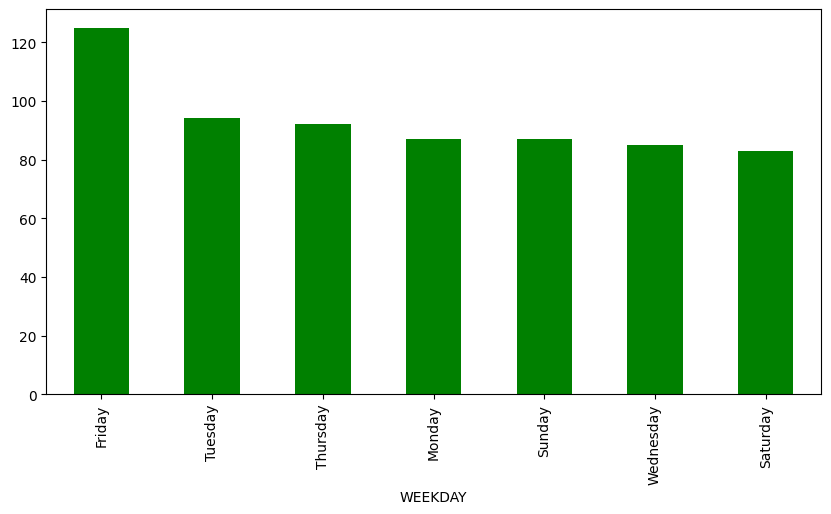

In [29]:
data['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

No of Trips per Day

<Axes: xlabel='DAY'>

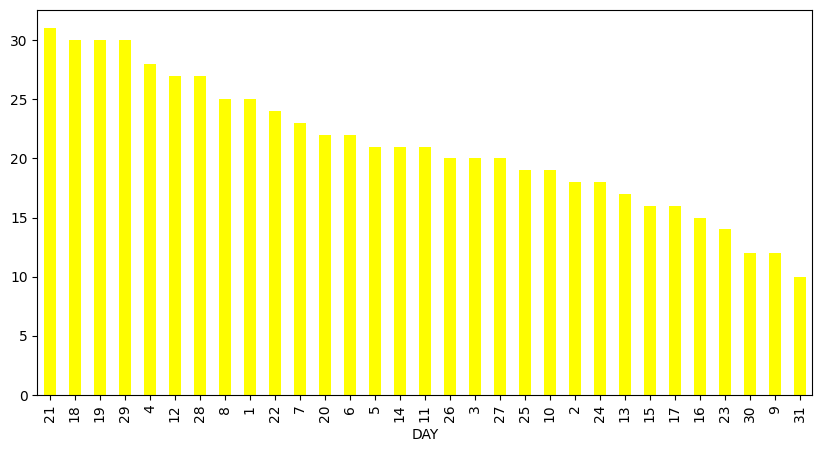

In [30]:
data['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='yellow')

Trips in a Month

<Axes: xlabel='MONTH'>

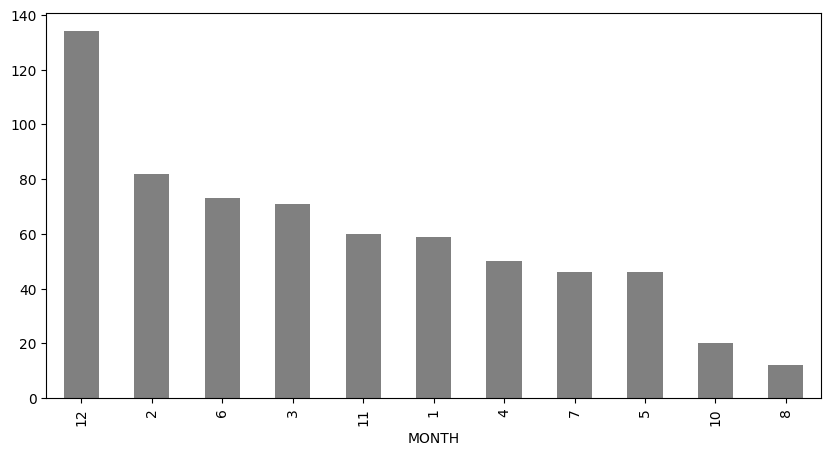

In [31]:
data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='grey')

The Start pont of Trip. from where  most people board the trip

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130]),
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Unknown Location'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Durham'),
  Text(5, 0, 'Kar?chi'),
  Text(6, 0, 'Raleigh'),
  Text(7, 0, 'Lahore'),
  Text(8, 0, 'Islamabad'),
  Text(9, 0, 'Mi

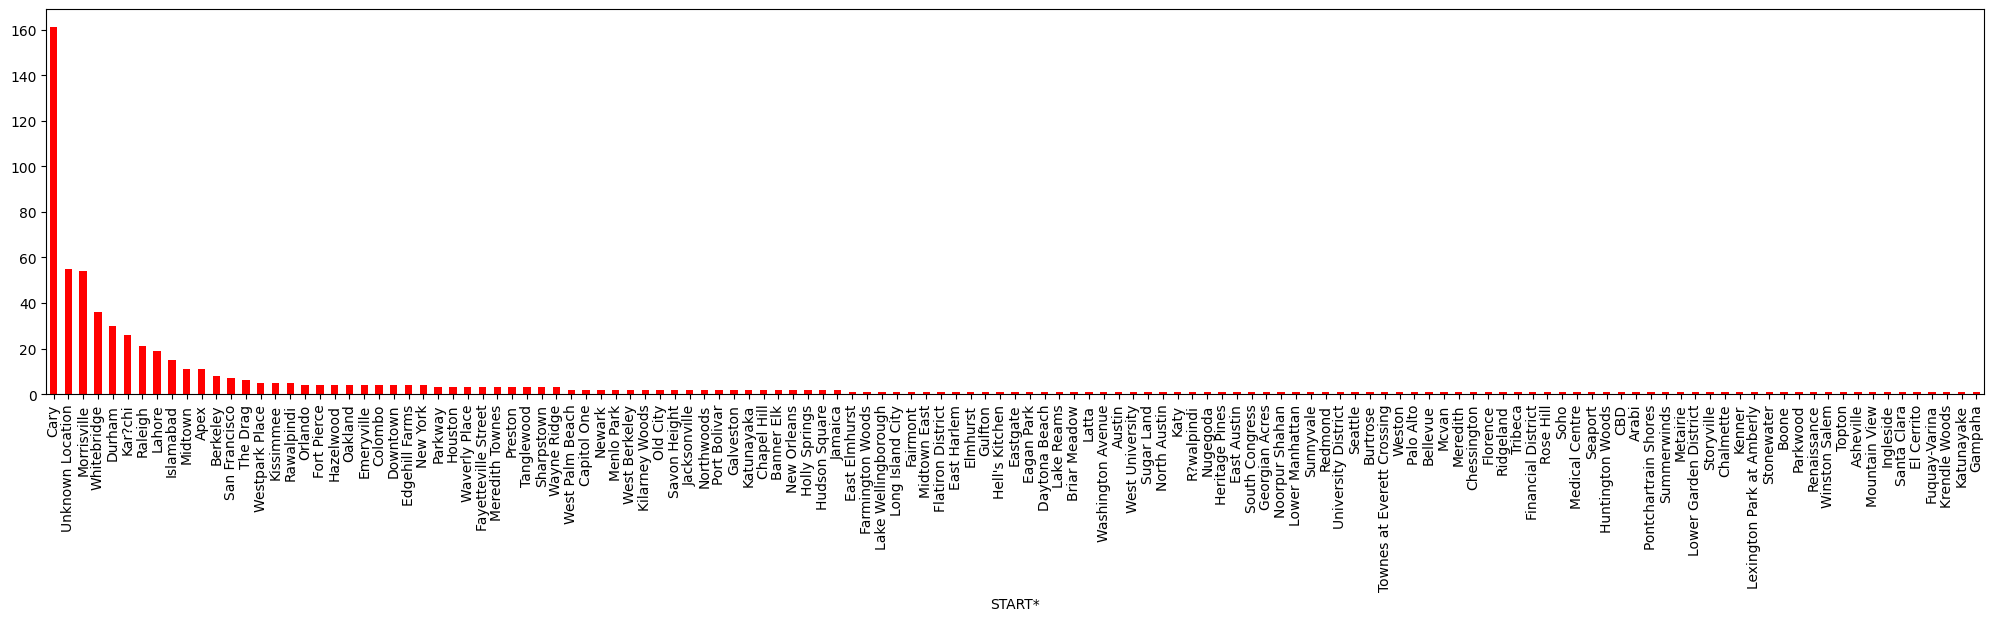

In [34]:
data['START*'].value_counts().plot(kind='bar',figsize=(25,5),color='Red')
plt.xticks(rotation=90)